<a href="https://colab.research.google.com/github/dsibi/yandex_praktikum_da/blob/main/videogames_market_research/videogames_market_research_ru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Исследование рынка видеоигр**

---

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

##Описание данных

*	Name — название игры
*	Platform — платформа
*	Year_of_Release — год выпуска
*	Genre — жанр игры
*	NA_sales — продажи в Северной Америке (миллионы проданных копий)
*	EU_sales — продажи в Европе (миллионы проданных копий)
*	JP_sales — продажи в Японии (миллионы проданных копий)
*	Other_sales — продажи в других странах (миллионы проданных копий)
*	Critic_Score — оценка критиков (максимум 100)
*	User_Score — оценка пользователей (максимум 10)
*	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

##Шаг 1. Откроем файл с данными и изучим общую информацию

---



Импортируем все необходимые нам библиотеки, далее новые библиотеки будем добавлять сюда же

In [ ]:
import pandas as pd
!pip install downcast
from downcast import reduce
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.simplefilter('ignore')

Запуск импорта данных с Google Drive (при работе через Google Colab)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Чтение файла

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/5.5_Сборый проект 1/data/games.csv')

Изучим по нему общую информацию 

In [ ]:
df_list = [df]
for df in df_list:
  display(df.sample(5))
  df.info()
  display(df.isna().sum())
  display(df.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11750,Scooby-Doo! Unmasked,XB,2005.0,Platform,0.06,0.02,0.00,0.00,NaN,NaN,NaN
5612,FIFA Street 3,PS3,2008.0,Sports,0.08,0.18,0.00,0.06,63.0,6.9,E
1224,Dishonored,PS3,2012.0,Action,0.72,0.52,0.04,0.25,89.0,7.9,M
13854,Pure Pinball,XB,2004.0,Misc,0.03,0.01,0.00,0.00,68.0,8.5,E
6489,Battlestations: Midway,X360,2007.0,Strategy,0.21,0.02,0.00,0.02,73.0,7.1,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


1. Необходимо скорректировать названия всех колонок
2. Тип данных - необходимо произвести изменение типа данных в следующих колонках:
* на категориальный: Platform, Genre, Rating
* на числовой, целочисленный: Year_of_Release
* на числовой, десятичный - User_Score
3. Пропуски: Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating

##Шаг 2. Подготовим данные

---



###2.1. Скорректируем названия всех колонок

In [ ]:
df.columns = df.columns.str.lower()

Названия колонок приведены к нижнему регистру.

###2.2. Произведем изменение типа данных 

In [ ]:
df = reduce(df)

In [ ]:
df.dtypes

name               category
platform           category
year_of_release     float16
genre              category
na_sales            float16
eu_sales            float16
jp_sales            float16
other_sales         float16
critic_score        float16
user_score         category
rating             category
dtype: object

Тип данных изменен автоматически для оптимизации работы с памятью.

#### 2.2.1. На числовой, целочисленный: Year_of_Release

In [ ]:
df['year_of_release']=df['year_of_release'].fillna(0).astype(int)
df.dtypes

name               category
platform           category
year_of_release       int64
genre              category
na_sales            float16
eu_sales            float16
jp_sales            float16
other_sales         float16
critic_score        float16
user_score         category
rating             category
dtype: object

Пропуски заменены на 0 и данные приведены к целочисленному числовому типу.

####2.2.2. На числовой, десятичный - User_Score

In [ ]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.dtypes

name               category
platform           category
year_of_release       int64
genre              category
na_sales            float16
eu_sales            float16
jp_sales            float16
other_sales         float16
critic_score        float16
user_score          float64
rating             category
dtype: object

Оценка пользователей приведена к десятичному числовому типу, значения tbd заменены на NaN, т.к. по ним рейтинг пока отсутствует и неизвестно каким он будет.

###2.3. Обработаем пропуски: Name, Year_of_Release, Genre, Critic_Score, User_Score и Rating

In [ ]:
display(df.isna().sum())

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Игры без наименования всего 2, поэтому просто удалим строки по ним.

In [ ]:
df=df.dropna(subset=['name'])

Пропуски в оценках критиков и пользователей, а также в рейтинге от организации ESRB заменим на значение, которое в последствии сможем всегда отфильтровать при необходимости.

In [ ]:
df.fillna(dict.fromkeys(['critic_score', 'user_score'], -10), inplace=True)
df['rating'] = df['rating'].cat.add_categories('unknown').fillna('unknown')

###2.4. Удалим возможные дубли

In [ ]:
df.shape

(16713, 11)

In [ ]:
df.drop_duplicates(keep=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.375000,28.953125,3.769531,8.453125,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.078125,3.580078,6.808594,0.770020,-10.0,-10.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.679688,12.757812,3.789062,3.289062,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.609375,10.929688,3.279297,2.949219,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.273438,8.890625,10.218750,1.000000,-10.0,-10.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.000000,0.000000,0.010002,0.000000,-10.0,-10.0,unknown
16711,LMA Manager 2007,X360,2006,Sports,0.000000,0.010002,0.000000,0.000000,-10.0,-10.0,unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.000000,0.000000,0.010002,0.000000,-10.0,-10.0,unknown
16713,Spirits & Spells,GBA,2003,Platform,0.010002,0.000000,0.000000,0.000000,-10.0,-10.0,unknown


In [ ]:
df.shape

(16713, 11)

Дублей не оказалось.

###2.5. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [ ]:
df['global_sales']= df.iloc[:, -8:-4].sum(axis=1)
df.sort_values(by='global_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.375000,28.953125,3.769531,8.453125,76.0,8.0,E,74.125000
1,Super Mario Bros.,NES,1985,Platform,29.078125,3.580078,6.808594,0.770020,-10.0,-10.0,unknown,39.468750
2,Mario Kart Wii,Wii,2008,Racing,15.679688,12.757812,3.789062,3.289062,82.0,8.3,E,32.218750
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.273438,8.890625,10.218750,1.000000,-10.0,-10.0,unknown,30.375000
3,Wii Sports Resort,Wii,2009,Sports,15.609375,10.929688,3.279297,2.949219,80.0,8.0,E,29.812500
...,...,...,...,...,...,...,...,...,...,...,...,...
16179,Pro Angler Moves,PS3,2012,Sports,0.010002,0.000000,0.000000,0.000000,-10.0,-10.0,E,0.010002
16180,WRC: FIA World Rally Championship,PC,0,Racing,0.000000,0.010002,0.000000,0.000000,65.0,-10.0,RP,0.010002
8045,Summer Athletics: The Ultimate Challenge,PS2,2008,Sports,0.000000,0.000000,0.000000,0.180054,-10.0,-10.0,E,0.000000
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.000000,0.000000,0.000000,0.000000,-10.0,-10.0,unknown,0.000000


##Шаг 3. Проведем исследовательский анализ данных

---



###3.1. Сколько игр выпускалось в разные годы

Создадим таблицу по годам выпуска и количеству выпущенных игр в каждом году, удалим нулевые значения в колонке Год выпуска.

In [ ]:
rel_years=df['year_of_release'].value_counts()
rel_years=pd.DataFrame({'year_of_release':rel_years.index, 'games_num':rel_years.values})
rel_years.drop(rel_years[rel_years['year_of_release']==0].index, inplace=True)

Создадим функцию, строящую столбчатую диаграмму по количеству выпущенных игр по годам и построим ее по всем данным в датасете.

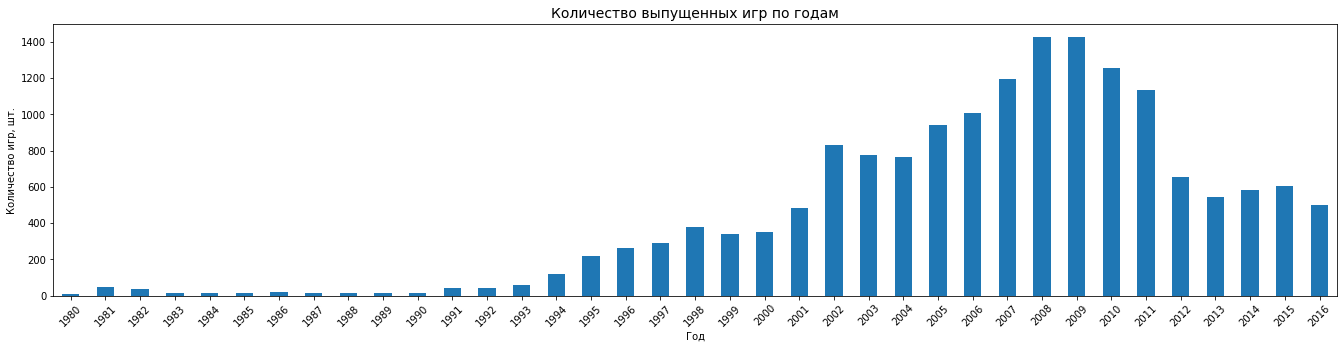

In [ ]:
def rel_years_chart(df, x, y):
  df.sort_values(by=x, ascending=True, inplace=True)
  ax=df.plot(x=x, y=y, kind='bar', figsize=(23, 5), rot=45)
  ax.get_legend().remove()
  plt.title('Количество выпущенных игр по годам', size=14)
  plt.xlabel('Год')
  plt.ylabel('Количество игр, шт.')
  plt.show()

rel_years_chart(rel_years, 'year_of_release', 'games_num')

Отберем данные за последние 10 лет, т.к. более длительный период для прогноза продаж на следующий год нас не интересует.

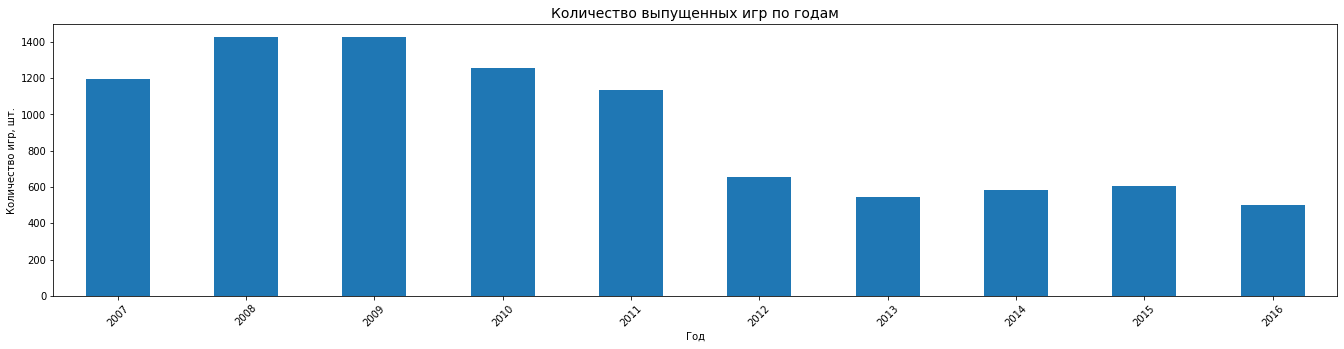

In [ ]:
rel_years_10=rel_years.query('year_of_release>2006').copy()
rel_years_chart(rel_years_10, 'year_of_release', 'games_num')

Отметим, что после мирового экономического кризиса в 2008 году продажи игр сохранились на уровне в 2009 году, но следом стали постепенно уменьшаться до 2013 года после чего уже менялись несущественно.

###3.2. Изменение продаж по платформам

Создадим таблицу по мировым продажам по каждой платформе и упорядочим данные в ней по объему продаж.

In [ ]:
platf_sales=df.groupby('platform')['global_sales'].sum().sort_values(ascending=False).reset_index()

Выделим 10 платформ с наибольшим количеством продаж и построим столбчатую диаграмму по ним.

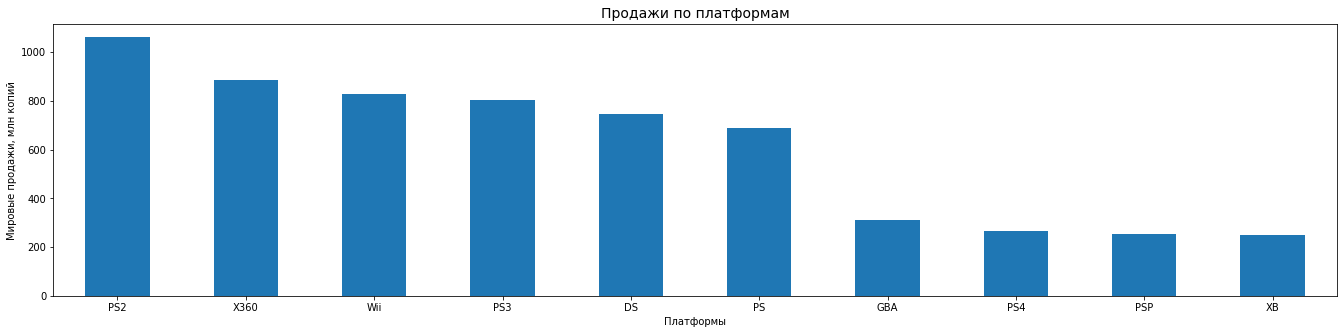

In [ ]:
platf_sales_top10=platf_sales.iloc[0:10,0:10]
ax=platf_sales_top10.plot(x='platform', y='global_sales', kind='bar', figsize=(23, 5), rot=360)
ax.get_legend().remove()
plt.title('Продажи по платформам', size=14)
plt.xlabel('Платформы')
plt.ylabel('Мировые продажи, млн копий')
plt.show()

Сохраним название этих платформ в отдельный список.

In [ ]:
top_10_platf=platf_sales_top10['platform'].tolist()
top_10_platf

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'XB']

Построим по этому списку график количества выпущенных игр по платформам.

In [ ]:
platf_sales_top10=df.drop(df[df.year_of_release == 0].index)
platf_sales_top10=platf_sales_top10.query('platform==@top_10_platf')
platf_sales_top10['platform']=platf_sales_top10['platform'].astype('object')
# fig, ax = plt.subplots(figsize=(23,5))
# platf_sales_top10.groupby(['year_of_release','platform']).count()['global_sales'].unstack().plot(ax=ax)
# ax.set_xlim(left=1993)
# plt.title('Количество выпущенных игр по платформам', size=14)
# plt.xlabel('Год')
# plt.ylabel('Количество выпущенных игр, шт.')
# plt.show()

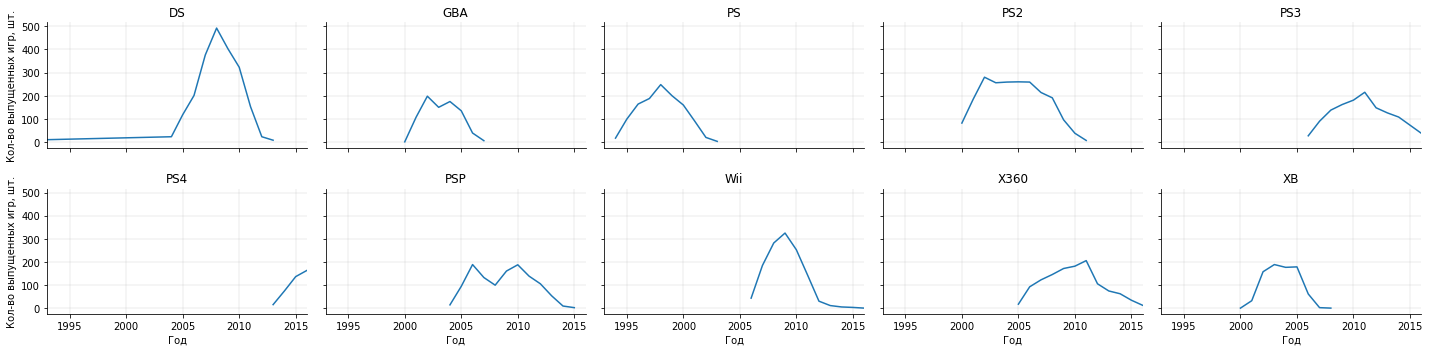

In [ ]:
platf_sales_top10_plot=platf_sales_top10.groupby(['year_of_release','platform']).count()['global_sales'].reset_index()

fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(20,5))
axes_list = [item for sublist in axes for item in sublist]

for platf, selection in platf_sales_top10_plot.groupby('platform'):
  ax = axes_list.pop(0)
  selection.plot(x='year_of_release', y='global_sales', ax=ax, label=platf, legend=False)
  ax.set_title(platf)
  ax.grid(linewidth=0.25)
  ax.set_xlim((1993, 2016))
  ax.set_xlabel("Год")
  ax.set_ylabel("Кол-во выпущенных игр, шт.")
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
plt.tight_layout()

Наблюдаем, по ряду платформ выпуск игр уже не ведется. Сфокусируем наше дальнейшее исследование на "живых" платформах.

###3.3. Лидирующие платформы по продажам

Создадим отдельную таблиц по лидирующим по продажам и выпускающим в настоящее время игры платформам, построим и изучим график выпуска игр по ним подробнее.


In [ ]:
top_5_platf=['X360', 'Wii', 'PS3', 'PS4', 'PSP']
platf_sales_top5=platf_sales_top10.query('platform==@top_5_platf').copy()

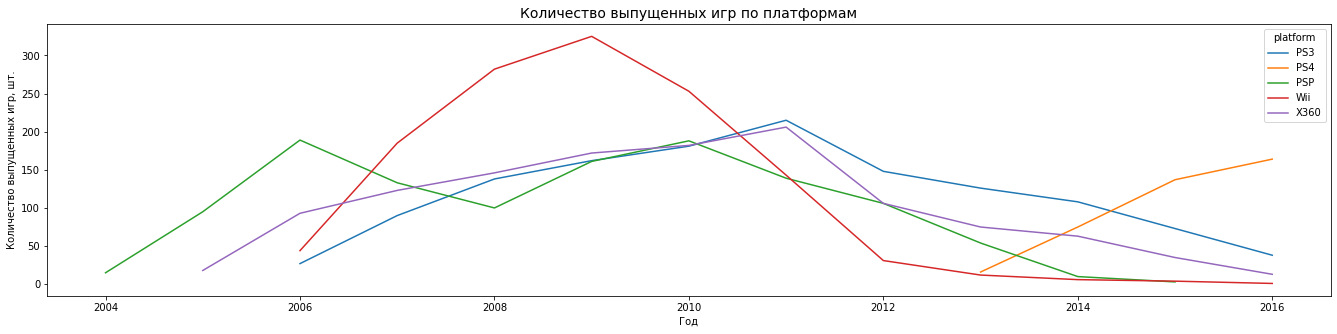

In [ ]:
fig, ax = plt.subplots(figsize=(23,5))
platf_sales_top5.groupby(['year_of_release','platform']).count()['global_sales'].unstack().plot(ax=ax)
plt.title('Количество выпущенных игр по платформам', size=14)
plt.xlabel('Год')
plt.ylabel('Количество выпущенных игр, шт.')
plt.show()

Наблюдаем, что по ряду платформ выпуск игр сокращается, кроме одной платформы - PS4, выпуск игр к которой начался в 2013 году и на протяжении 3 лет демонстрирует пололжительную тенденцию.

###3.4. Разброс суммы глобальных продаж

Посмотрим на разброс суммы мировых продаж по каждой из платформ на коробчатой диаграмме.

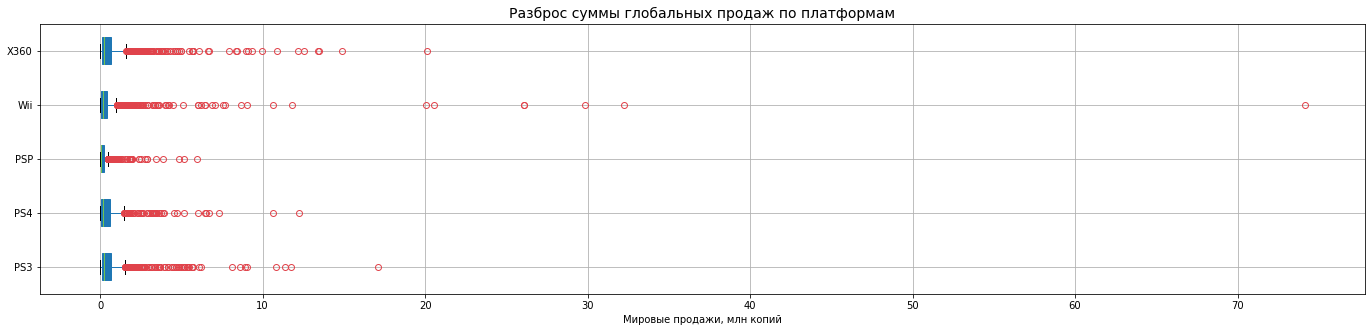

In [ ]:
platf_sales_top5=platf_sales_top5.sort_values(by='platform')
ax=platf_sales_top5.boxplot(column='global_sales', by='platform', vert=False, figsize=(23,5), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
plt.suptitle('')
plt.title('Разброс суммы глобальных продаж по платформам', size=14)
plt.xlabel('Мировые продажи, млн копий')
plt.show()

Удалим явные выбросы.

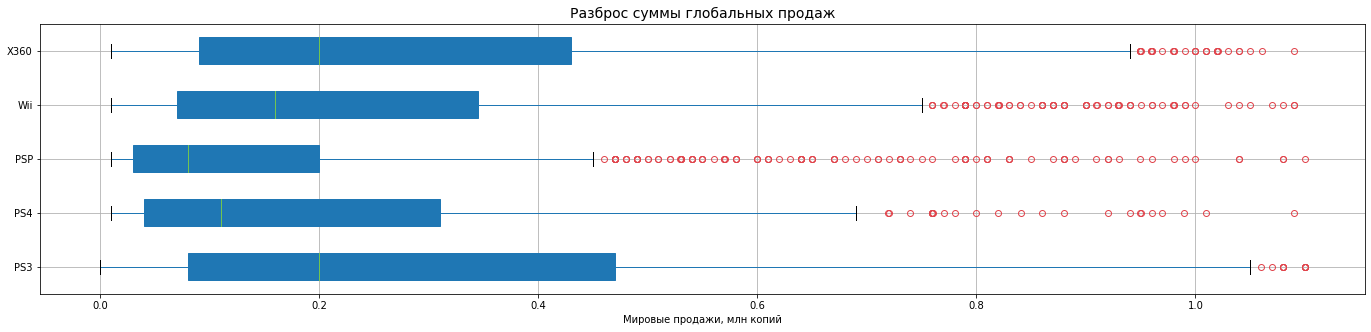

In [ ]:
platf_sales_top5_cut=platf_sales_top5.drop(platf_sales_top5[platf_sales_top5['global_sales'] > 1.1].index, inplace=True)
ax=platf_sales_top5.boxplot(column='global_sales', by='platform', vert=False, figsize=(23,5), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
plt.suptitle('')
plt.title('Разброс суммы глобальных продаж', size=14)
plt.xlabel('Мировые продажи, млн копий')
plt.show()

Максимальные медианное значение по продажам у платформ - X360 и PS3. Максимальный разброс покупаемости игр отмечается у платформы PS3.
В соответствии с этим самой популярной платформой в настоящий момент является PS3.

###3.5. Влияние отзывов на уровень продаж

####3.5.1. По популярной платформе

#####3.5.1.1. По отзывам критиков

In [ ]:
def score_vs_sales (df_slice, score):
  df_slice.plot(x=score, y='global_sales', kind='scatter', alpha=0.2)
  plt.xlabel('Оценка')
  plt.ylabel('Мировые продажи, млн копий')
  plt.show()
  print('Корреляция - ', df_slice[score].corr(df['global_sales']).round(2))

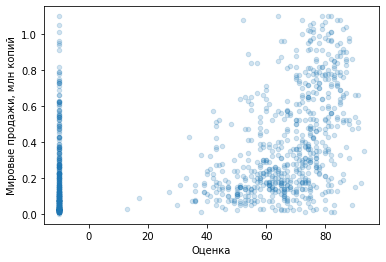

Корреляция -  0.49


In [ ]:
score_vs_sales(platf_sales_top5.query('platform=="PS3"'), 'critic_score')

Имеется средневыраженная положительная тенденция - чем выше оценки критиков, тем больше количество продаж.

Игры без оценок в большей степени концентрируются в отметке продаж до 0,38 млн копий.

#####3.5.1.2. По отзывам пользователей

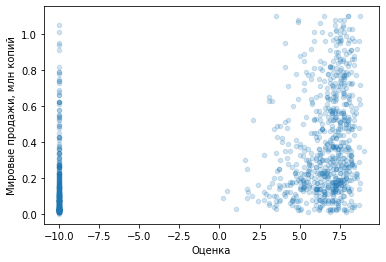

Корреляция -  0.46


In [ ]:
score_vs_sales(platf_sales_top5.query('platform=="PS3"'), 'user_score')

По оценке пользователей корреляция аналогична, но менее выраженная.

Игры без оценок в большей степени концентрируются в отметке продаж до 0,3 млн копий.

####3.5.2. По остальным платформам

#####3.5.2.1. По отзывам критиков

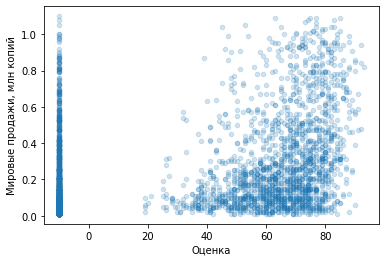

Корреляция -  0.38


In [ ]:
score_vs_sales(platf_sales_top5.query('platform!="PS3"'), 'critic_score')

Имеется слабовыраженная положительная тенденция - чем выше оценки критиков, тем больше количество продаж.

Игры без оценок в большей степени концентрируются в отметке продаж до 0,6 млн копий.

#####3.5.2.2. По отзывам пользователей

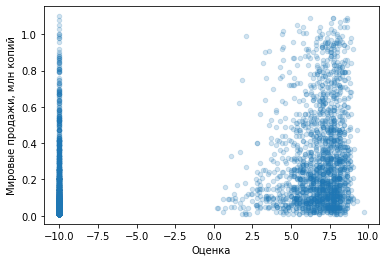

Корреляция -  0.37


In [ ]:
score_vs_sales(platf_sales_top5.query('platform!="PS3"'), 'user_score')

По оценке пользователей корреляция аналогична, но менее выраженная. Основная концентрация оценок приходится на значения в диапазоне от 6 до 8 при продажах до 0,2 млн копий.

Игры без оценок в большей степени концентрируются в отметке продаж до 0,5 млн копий.

###3.6. Общее распределение игр по жанрам

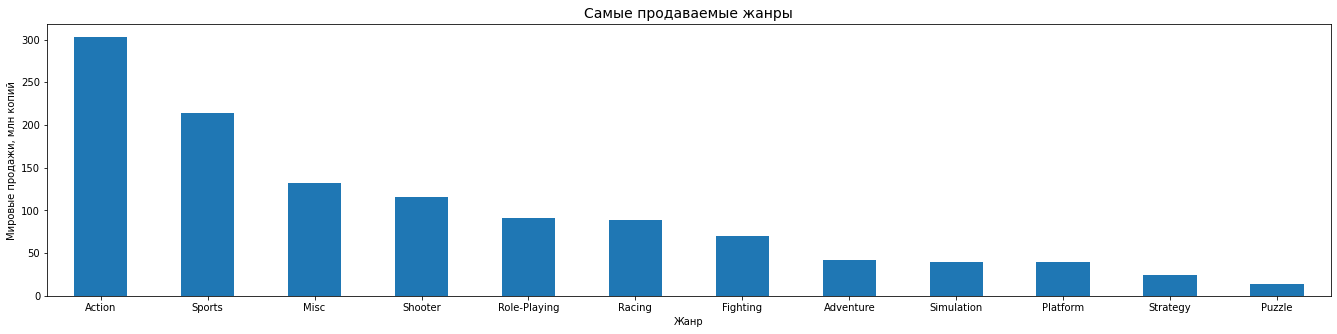

In [ ]:
genre=platf_sales_top5.groupby('genre')['global_sales'].sum().reset_index()
ax=genre.sort_values(by='global_sales', ascending=False).plot(x='genre', y='global_sales', kind='bar', figsize=(23, 5), rot=360)
ax.get_legend().remove()
plt.title('Самые продаваемые жанры', size=14)
plt.xlabel('Жанр')
plt.ylabel('Мировые продажи, млн копий')
plt.show()

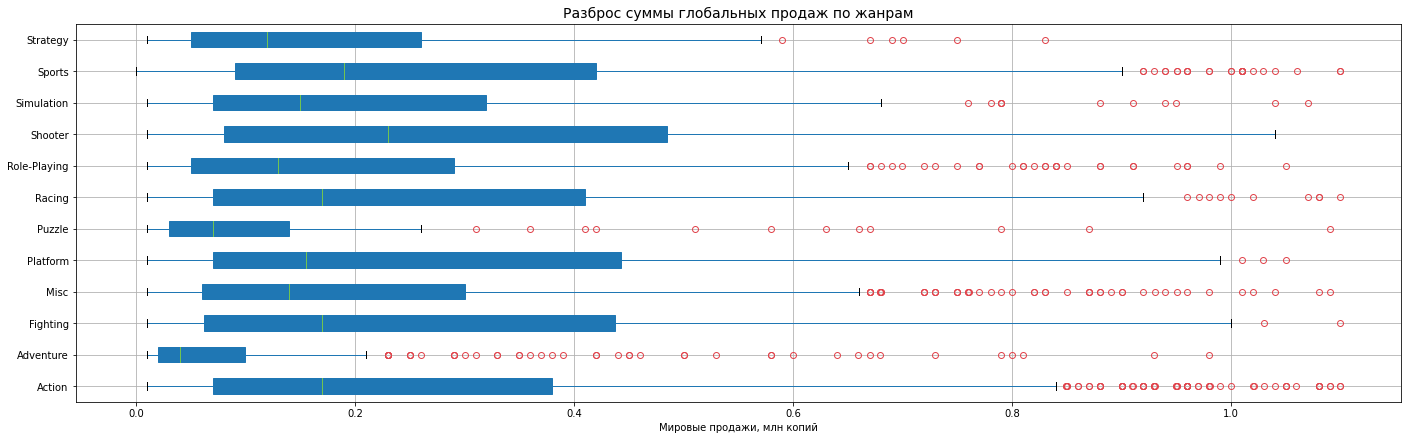

In [ ]:
ax=platf_sales_top5.boxplot(column='global_sales', by='genre', vert=False, figsize=(23,7), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
plt.suptitle('')
plt.title('Разброс суммы глобальных продаж по жанрам', size=14)
plt.xlabel('Мировые продажи, млн копий')
plt.show()

Максимальные медианное значение и разброс покупаемости игр отмечается у жанра Shooter.

Следом за ним по медианному значению идет Sports.

##Шаг 4. Составим портрет пользователя каждого региона
---



###4.1. Самые популярные платформы

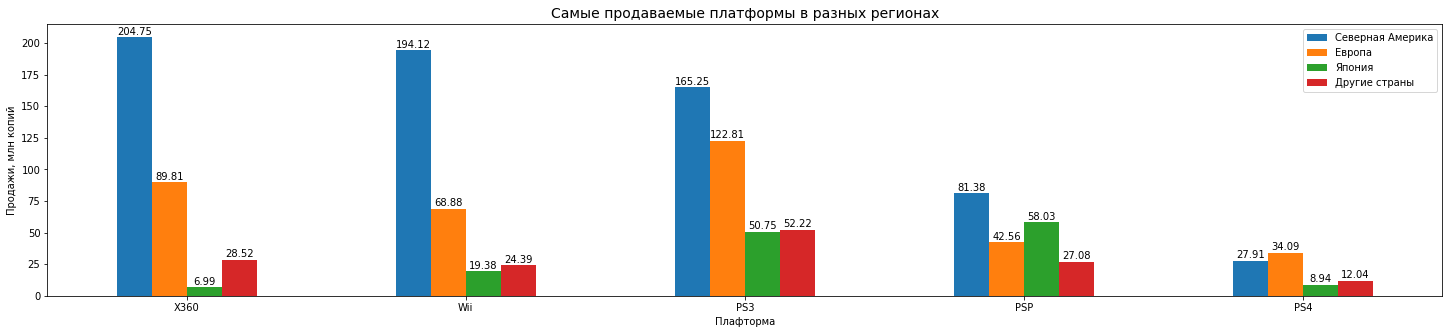

In [ ]:
region_sales=platf_sales_top5.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').reset_index().sort_values('na_sales', ascending = False)
ax=region_sales.plot(x='platform', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], kind='bar', figsize=(25, 5), rot=360)
ax.legend(['Северная Америка', 'Европа', 'Япония', 'Другие страны'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 2,
            '{:.2f}'.format(height),
            fontsize=10,
            ha="center")
plt.title('Самые продаваемые платформы в разных регионах', size=14)
plt.xlabel('Плафторма')
plt.ylabel('Продажи, млн копий')
plt.show()

Максимальные продажи наблюдаются в странах Северной Америки, там самой популярной является платформа X360, в Японии предпочтение отдают платформе PSP, а весь остальной мир покупает в основном игры для PS3.

###4.2. Самые популярные жанры

Подготовим таблицу с ТОП-5 продаж по жанрам и построим график.

In [ ]:
na=platf_sales_top5.pivot_table(index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values('na_sales', ascending = False).head(5)
eu=platf_sales_top5.pivot_table(index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values('eu_sales', ascending = False).head(5)
jp=platf_sales_top5.pivot_table(index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values('jp_sales', ascending = False).head(5)
other=platf_sales_top5.pivot_table(index='genre', values='other_sales', aggfunc='sum').reset_index().sort_values('other_sales', ascending = False).head(5)
region_sales=na.copy()
region_sales = region_sales.merge(eu, on='genre', how='outer')
region_sales = region_sales.merge(jp, on='genre', how='outer')
region_sales = region_sales.merge(other, on='genre', how='outer')

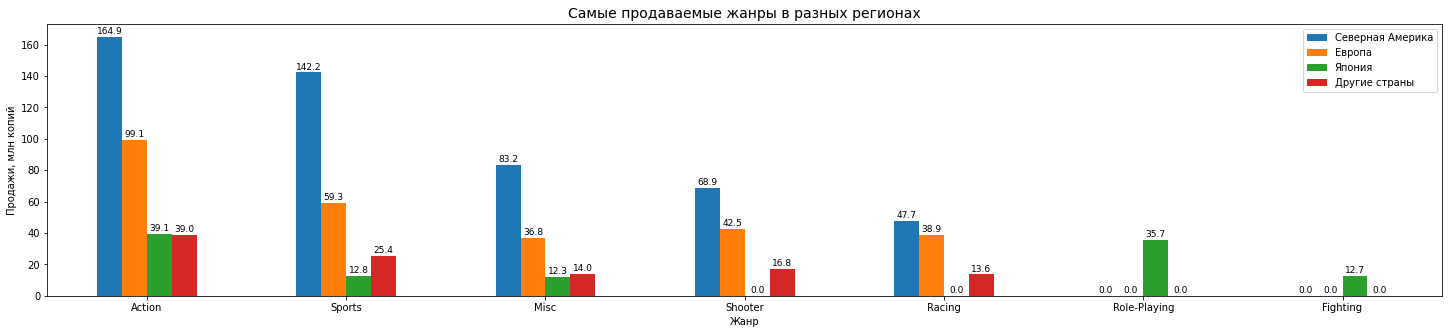

In [ ]:
ax=region_sales.plot(x='genre', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], kind='bar', figsize=(25, 5), rot=360)
ax.legend(['Северная Америка', 'Европа', 'Япония', 'Другие страны'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 2,
            '{:.1f}'.format(height),
            fontsize=9,
            ha="center")
plt.title('Самые продаваемые жанры в разных регионах', size=14)
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.show()

Жанры популярные во всем мире - Action, Sports и Misc: продажи по ним входят в ТОП-5 во всех регионах.

Рынок Японии отличается от мирового рынка - так, например в ТОП-5 продаж не входят такие жанры игр как Shooter и Racing, зато в ТОП входят не самые популярные в иных странах мира - Role-Playing (который является 2-ым по популярности у японцев) и Fighting.

###4.3.	Влияние рейтинга ESRB на продажи в отдельном регионе

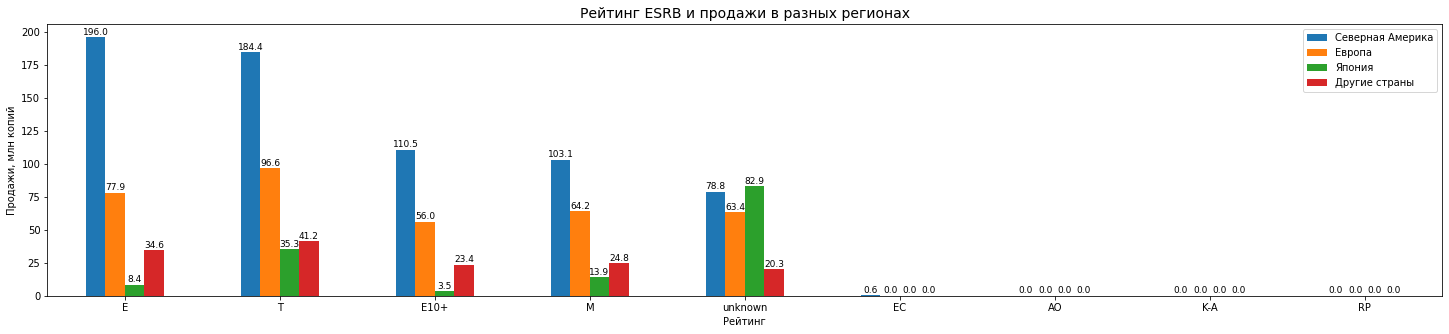

In [ ]:
region_sales=platf_sales_top5.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').reset_index().sort_values('na_sales', ascending = False)
ax=region_sales.plot(x='rating', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], kind='bar', figsize=(25, 5), rot=360)
ax.legend(['Северная Америка', 'Европа', 'Япония', 'Другие страны'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,
            height + 2,
            '{:.1f}'.format(height),
            fontsize=9,
            ha="center")
plt.title('Рейтинг ESRB и продажи в разных регионах', size=14)
plt.xlabel('Рейтинг')
plt.ylabel('Продажи, млн копий')
plt.show()

Игры с рейтингом E (Everyone - англ. «Для всех») от ассоциация ESRB являются самыми продаваемыми во всем мире, за ними следуют игры с рейтингом T (Teen - англ. «Подросткам 13—19 лет»), далее почти в 2 раза ниже продажи игр с рейтингами M (Mature - англ. «От 17 лет») и E10+ (Everyone 10 and older - англ. «Для всех старше 10 лет»).

По играм с иными рейтингами продажи крайне низкие.

##Шаг 5. Проверем гипотезы
---


###5.1.	Средние пользовательские рейтинги платформ X360 и PSP

*   H0 - cредние пользовательские рейтинги платформ X360 и PSP одинаковые
*   H1 - cредние пользовательские рейтинги платформ X360 и PSP разные

In [ ]:
hypo=df[df['platform'].isin(['PSP', 'X360']) ]
hypo=hypo.query('user_score != -10')

Рассчитаем дисперсию генеральных совокупностей по X360 и PSP.

In [ ]:
variance_estimate1 = np.var(hypo.loc[hypo['platform']=='X360', 'user_score'])
print(variance_estimate1)

variance_estimate2 = np.var(hypo.loc[hypo['platform']=='PSP', 'user_score'])
print(variance_estimate2)

2.07528808687937
1.501885116874765


Дисперсии отличаются более чем на 5 % - разница существенная, поэтому в тесте необходимо указать параметр equal_var = False.

In [ ]:
alpha = .05
results = st.ttest_ind(hypo.query("platform=='X360'")['user_score'], hypo.query("platform=='PSP'")['user_score'], equal_var = False)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.2549822485808881e-12
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ X360 и PSP разные, так как значение статистической значимости меньше критического уровня статистической значимости.

###5.2.	Средние пользовательские рейтинги жанров Action и Sports

*   H0 - средние пользовательские рейтинги жанров Action и Sports одинаковые
*   H1 - средние пользовательские рейтинги жанров Action и Sports разные

In [ ]:
hypo=df[df['genre'].isin(['Action', 'Sports']) ]

Рассчитаем дисперсию генеральных совокупностей по Action, Sports.

In [ ]:
variance_estimate1 = np.var(hypo.loc[hypo['genre']=='Action', 'user_score'])
print(variance_estimate1)

variance_estimate2 = np.var(hypo.loc[hypo['genre']=='Sports', 'user_score'])
print(variance_estimate2)

73.27064527807151
72.87613840043424


Дисперсии отличаются менее чем на 5 % - разница несущественная, поэтому в тесте укажем параметр equal_var = True.

In [ ]:
alpha = .05
results = st.ttest_ind(hypo.query("genre=='Action'")['user_score'], hypo.query("genre=='Sports'")['user_score'], equal_var = True)
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.8191551181950086e-08
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports разные, так как значение статистической значимости меньше критического уровня статистической значимости.

##Шаг 6. Общий вывод

---



При работе с проектом были выполнениы следующие шаги:
1. Открыт файл с данными и изучена общая информация
2. Данные подготовлены:
* скорректированы названия всех колонок
* произведено изменение типа данных
* обработаны пропуски и дубли
* посчитаны суммарные продажи во всех регионах
3. Проведен исследовательский анализ данных:
* сколько игр выпускалось в разные годы
* изменение продаж по платформам
* лидирующие платформы по продажам
* разброс суммы глобальных продаж
* влияние отзывов на уровень продаж
* общее распределение игр по жанрам
4. Составлен портрет пользователя каждого региона:
* самые популярные платформы
* самые популярные жанры
* влияние рейтинга ESRB на продажи в отдельном регионе
5. Проверены гипотезы:
* средние пользовательские рейтинги платформ Xbox One и PC
* средние пользовательские рейтинги жанров Action и Sports

####Резюме


---


При планировании продаж на 2017 год стоит принять во внимание следующие аспекты:
* сумма продаж за последние 5 лет колеблется незначительно - 400-600 млн копий;
* ТОП-5 платформ, выпускающих игры в настоящий момент - X360, Wii, PS3, PS4, PSP;
* увеличение выпускаемых игр наблюдается по платформе - PS4;
* максимальное медианное значение по продажам у платформ - X360 и PS3, а максимальный разброс покупаемости игр отмечается у платформы PS3;
* оценки как критиков, так и пользователей игр не имеют сильного влияния на объемы продаж, тут вероятнее всего выходит на первый план маркетинговая раскрутка игр;
* максимальные медианное значение и разброс покупаемости игр отмечается у жанра Shooter.

В отношении каждого региона можно отметить следующее:
* наибольшие продажи происходят в странах Северной Америки, самой популярной платформой там является X360, а жанром - Action;
* в Японии лидерами являются - PSP и Role-Playing;
* в Европе и других странах мира лучше дела обстоят с покупкой игр к платформе PS3, а самым популярным жанром является Action.

Проверили гипотезы и опровергли предположения о том, что:

cредние пользовательские рейтинги платформ X360 One и PSP одинаковые;
средние пользовательские рейтинги жанров Action и Sports одинаковые.

* cредние пользовательские рейтинги платформ X360 One и PSP одинаковые;
* средние пользовательские рейтинги жанров Action и Sports одинаковые.
